In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import arange, array

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet, Lasso, Ridge, LinearRegression

from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression

from sklearn.metrics import mean_squared_error, r2_score

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [4]:
housing = pd.read_csv('data/houseprice_clean.csv')
housing.shape

(2580, 80)

In [3]:
housing.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [5]:
price = housing['SalePrice']
features = housing.drop(["SalePrice"], axis=1)
log_price = np.log(housing.SalePrice)

## Scale Features

In [6]:
num_features = features.select_dtypes(include=['int64','float64'])
cat_features = features.select_dtypes(include=['object'])

In [100]:
# Scaling

# do I train the scaler on the train set only, or can I do on the whole set?
# is it important to scale train/test separately? (see scratch for example)

scaler = StandardScaler()
num_feat_scaled = pd.DataFrame(scaler.fit_transform(num_features), columns = num_features.columns)
features_scaled = pd.concat([num_feat_scaled, cat_features], axis = 1)
features_scaled = pd.get_dummies(features_scaled, drop_first=True)

In [101]:
features_scaled.shape

(2580, 268)

In [105]:
# confirm only numerical features are standardized
features_scaled.head()

,GrLivArea,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSewr,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,...,BsmtQual_None,BsmtQual_Po,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_None,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,PoolQC_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.289598,-0.647100,-0.298749,-0.274468,-0.033733,0.339988,-1.053847,-1.647539,-0.562750,-0.480304,-0.305221,0.186062,-0.430387,-0.768784,-0.794405,-0.095609,1.089555,-0.25377,-1.009265,-0.757892,-1.033650,-0.199051,-1.555298,0.610254,-1.397394,0.341856,-0.327115,-0.743408,-0.697756,-0.362184,-0.099302,2.636678,-0.054791,-0.097731,-1.180008,1.647483,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,-0.894555,1.456008,-0.663099,-0.724294,-0.765088,-0.551444,0.460593,0.012109,0.286195,0.251192,1.948743,-1.022874,0.030354,-0.255331,-0.794405,-0.095609,1.089555,-0.25377,0.823179,-0.757892,-1.033650,-0.199051,-0.903785,-0.931817,0.333582,-1.012439,-0.968399,-0.743408,0.892001,-0.362184,-0.

## Feature Importance

In [39]:
# adapted from https://machinelearningmastery.com/feature-selection-for-regression-data/

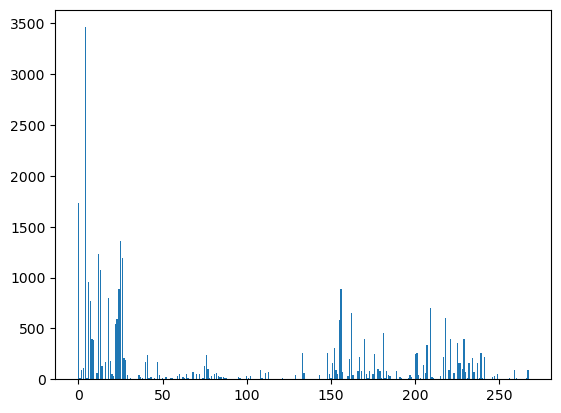

In [140]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=f_regression, k='all')
 
    # learn relationship from training data
    fs.fit(X_train, y_train)
 
    # transform train and test data
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
X_train, X_test, y_train, y_test = train_test_split(X, log_y, test_size=0.33, random_state=1)
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# plot the scores
fig, ax = plt.subplots()
ax.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [141]:
selected_features = list(X.columns[fs.get_support()]) # all features
scores = fs.scores_
feature_imp = pd.DataFrame(scores, index=selected_features)
feature_imp.columns = ['imp']
feature_imp.sort_values('imp', ascending = False).head(10)

,imp
OverallQual,3461.159705
GrLivArea,1733.689920
GarageCars,1356.437008
TotalBsmtSF,1236.368377
GarageArea,1192.955224
1stFlrSF,1073.143268
YearBuilt,958.562734
GarageYrBlt,887.885217
ExterQual_TA,887.330955
FullBath,798.651117


In [142]:
feature_imp[feature_imp['imp'] == 0] # 8 columns

,imp
Neighborhood_Landmrk,0.0
Condition2_RRAn,0.0
RoofMatl_Membran,0.0
RoofMatl_Metal,0.0
Electrical_None,0.0
KitchenQual_Po,0.0
Functional_Sal,0.0
SaleType_VWD,0.0


In [152]:
sel_fregression = list(feature_imp[feature_imp['imp'] != 0].index)
feat_fregression = features_scaled[sel_fregression]
feat_fregression.shape

(2580, 260)

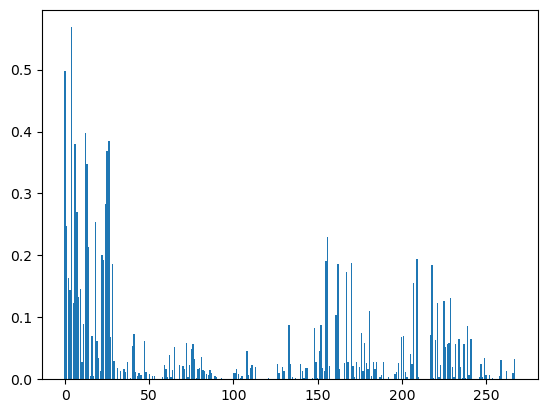

In [158]:
# same as above, with with 'mutual info regression'

def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
 
    # learn relationship from training data
    fs.fit(X_train, y_train)
 
    # transform train and test data
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
X_train, X_test, y_train, y_test = train_test_split(X, log_y, test_size=0.33, random_state=1)
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# plot the scores
fig, ax = plt.subplots()
ax.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [156]:
# top 10 features vary slightly from above
# magnitude of 'scores' are very different

selected_features = list(X.columns[fs.get_support()])
scores = fs.scores_
feature_imp = pd.DataFrame(scores, index=selected_features)
feature_imp.columns = ['imp']
feature_imp.sort_values('imp', ascending = False).head(10)

,imp
OverallQual,0.565594
GrLivArea,0.498505
TotalBsmtSF,0.395811
GarageArea,0.384478
YearBuilt,0.375095
GarageCars,0.368235
1stFlrSF,0.347140
GarageYrBlt,0.284288
YearRemodAdd,0.269084
FullBath,0.252413


In [159]:
feature_imp[feature_imp['imp'] == 0]
feature_imp[feature_imp['imp'] == 0].shape # 51 columns

(51, 1)

In [161]:
sel_mutualreg = list(feature_imp[feature_imp['imp'] != 0].index)
feat_mutualreg = features_scaled[sel_mutualreg]
feat_mutualreg.shape

(2580, 217)

## Pipeline

In [26]:
X = features_scaled
y = price
log_y = log_price

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, log_y, test_size=0.3, random_state=42, shuffle=True)

In [86]:
ridge = Ridge()

pipeline = Pipeline([
     ('selector',SelectKBest(f_regression)),
     ('model',Ridge())])

In [87]:
params1 = {
    'selector__k': arange(150, 265, 5),
    'model__alpha': arange(10, 12, 1)
}
# with log y: returns alpha:11, k: 260, R^2: .9306

params2 = {
    'selector__k': arange(255, 268, 1),
    'model__alpha': arange(10, 12, .1)
}
# with log y: returns alpha:11.1, k: 262, R^2: .9306
# with y: alpha 11.9, k: 255, R^2 .9237

cv = KFold(n_splits=10, shuffle = True, random_state = 0)
gs = GridSearchCV(pipeline, params2, scoring='r2', cv=cv)
gs.fit(X_train, y_train)

print("The best parameters are: ", gs.best_params_)
print("R^2 of the final model: ", gs.score(X_test, y_test))

The best parameters are:  {'model__alpha': 11.099999999999996, 'selector__k': 262}
R^2 of the final model:  0.9306058167156752


In [67]:
# print removed features (6)
X.columns[~gs.best_estimator_.named_steps['selector'].get_support()]

Index(['Neighborhood_Landmrk', 'Neighborhood_Mitchel', 'Condition2_RRAe',
       'RoofMatl_Membran', 'RoofMatl_Roll', 'Electrical_None'],
      dtype='object')

In [91]:
cols = X.columns[gs.best_estimator_.named_steps['selector'].get_support()]
coefs = gs.best_estimator_.named_steps['model'].coef_

coefs = pd.DataFrame(coefs, index=cols)
coefs.columns = ['coef']
coefs.sort_values(by = 'coef', ascending = False)

,coef
SaleCondition_Normal,0.094204
Neighborhood_Crawfor,0.089997
OverallQual,0.078651
Exterior1st_BrkFace,0.074669
Condition2_Norm,0.074495
...,...
Functional_Maj2,-0.063303
BldgType_Twnhs,-0.064283
Neighborhood_MeadowV,-0.068599
MSZoning_C (all),-0.086593


In [93]:
# none are 0
coefs[coefs['coef'] == 0]

,coef


In [95]:
lasso = Lasso()

pipeline = Pipeline([
     ('selector',SelectKBest(f_regression)),
     ('model',Lasso())])

In [96]:
params1 = {
    'selector__k': arange(150, 265, 5),
    'model__alpha': arange(0, 15, 1)
}
# with log y: returns alpha:0, k: 200, R^2: .9030

params2 = {
    'selector__k': arange(190, 210, 1),
    'model__alpha': arange(0, 1, .1)
}
# with log y: returns alpha: 0.9, k: 199, R^2: .9039
# with y (not log y): returns alpha: 0.9, k: 191, R^2: .9190

cv = KFold(n_splits=10, shuffle = True, random_state = 0)
gs = GridSearchCV(pipeline, params2, scoring='r2', cv=cv)
gs.fit(X_train, y_train)

print("The best parameters are: ", gs.best_params_)
print("R^2 of the final model: ", gs.score(X_test, y_test))

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.170e+00, tolerance: 2.416e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.827e+00, tolerance: 2.408e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.343e+00, tolerance: 2.421e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpecte

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.634e+00, tolerance: 2.425e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpecte

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.437e+00, tolerance: 2.425e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpecte

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.138e+00, tolerance: 2.382e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpecte

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.121e+00, tolerance: 2.416e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpecte

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.299e+00, tolerance: 2.421e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpecte

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.611e+00, tolerance: 2.425e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpecte

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.387e+00, tolerance: 2.425e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpecte

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.100e+00, tolerance: 2.382e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpecte

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.087e+00, tolerance: 2.416e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpecte

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.713e+00, tolerance: 2.408e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpecte

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.495e+00, tolerance: 2.421e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpecte

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.663e+00, tolerance: 2.413e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpecte

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.992e+00, tolerance: 2.336e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegress

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.291e+00, tolerance: 2.381e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.347e+00, tolerance: 2.448e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.036e+00, tolerance: 2.416e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpecte

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.667e+00, tolerance: 2.408e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.632e+00, tolerance: 2.413e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpecte

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.946e+00, tolerance: 2.336e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpecte

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.336e+00, tolerance: 2.425e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.003e+00, tolerance: 2.382e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpecte

The best parameters are:  {'model__alpha': 0.0, 'selector__k': 199}
R^2 of the final model:  0.903896378776322


/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.370e+00, tolerance: 2.673e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear

In [97]:
cols = X.columns[gs.best_estimator_.named_steps['selector'].get_support()]
coefs = gs.best_estimator_.named_steps['model'].coef_

coefs = pd.DataFrame(coefs, index=cols)
coefs.columns = ['coef']
coefs.sort_values(by = 'coef', ascending = False)

,coef
BsmtQual_Po,0.492053
SaleCondition_Partial,0.339725
Condition2_PosA,0.205938
GrLivArea,0.189589
Functional_Typ,0.149979
SaleCondition_Normal,0.139392
Neighborhood_Crawfor,0.138022
Neighborhood_Somerst,0.132802
BsmtFinType1_None,0.121823
CentralAir_Y,0.114064


In [98]:
# none are 0
coefs[coefs['coef'] == 0]

,coef


In [99]:
gs.best_estimator_.named_steps['model'].feature_importances_

AttributeError: 'Lasso' object has no attribute 'feature_importances_'

## Ridge Regression

In [22]:
X = features_scaled
y = price
log_y = log_price

In [20]:
# sale price as target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

ridge = Ridge()
ridge.fit(X_train, y_train)

cv = KFold(n_splits=10, shuffle = True, random_state = 0)
scores = cross_val_score(ridge, X_test, y_test, cv=cv, scoring="r2")

print(f"Average R-squared score: {scores.mean()}")
scores

Average R-squared score: 0.8955938517676391


array([0.92222589, 0.90989507, 0.91018788, 0.91087126, 0.84643693,
       0.81357715, 0.89095646, 0.9403667 , 0.89390703, 0.91751413])

In [21]:
# with log of sale price as target, R^2 improves by 1.5%
X_train, X_test, y_train, y_test = train_test_split(X, log_y, test_size=0.3, random_state=42, shuffle=True)

ridge = Ridge()
ridge.fit(X_train, y_train)

cv = KFold(n_splits=10, shuffle = True, random_state = 0)
scores = cross_val_score(ridge, X_test, y_test, cv=cv, scoring="r2")

print(f"Average R-squared score: {scores.mean()}")
scores

Average R-squared score: 0.910450634123497


array([0.89925269, 0.92784709, 0.92094067, 0.91745007, 0.88536431,
       0.85177406, 0.92434615, 0.94112702, 0.91733762, 0.91906667])

In [29]:
params = {
    "alpha": arange(0, 10, 1)
}

gs = GridSearchCV(ridge, params, scoring='r2', cv=kfold)
gs.fit(X_train, y_train)

print(gs.best_params_)
print(gs.score(X_test, y_test))

{'alpha': 9}
0.9226001784281416


In [30]:
params = {
    "alpha": arange(8, 10, .1)
}

gs = GridSearchCV(ridge, params, scoring='r2', cv=kfold)
gs.fit(X_train, y_train)

print(gs.best_params_)
print(gs.score(X_test, y_test))

{'alpha': 9.499999999999995}
0.9224935293906693


In [27]:
alphas = np.arange(0, 11)
coefs = []
scores = []
for alpha in alphas:
    ridge.set_params(alpha=alpha)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    scores.append(ridge.score(X_test, y_test))
coefs = pd.DataFrame(coefs, index=alphas, columns=X_train.columns)
coefs.head()

,GrLivArea,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,MSZoning_A (agr),MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,...,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_None,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_TA,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
0,-2.251290e+18,-2808.106162,4.774428,4156.641281,9267.106451,4449.716546,10301.859503,719.518246,4484.790990,9.053246e+17,3.677323e+17,8.966978e+17,-8.834597e+17,1.732104e+18,1.953770e+18,2.045746e+17,1013.670461,-47.483672,449.579860,-803.522061,-2884.785069,-2623.033207,6523.151544,4967.080188,1056.938694,-16.276861,1053.556071,1882.292558,-112.184793,-56.040540,1.679781e+18,2.551238e+17,2.551238e+17,1.221053e+18,2.551238e+17,2.551238e+17,2.551238e+17,5842.677139,8.134489e+17,8.134489e+17,8.134489e+17,1367.059306,4702.801844,1414.894035,-5.894098e+17,-5.894098e+17,-5.894098e+17,-5.894098e+17,9.659295e+17,5.114575e+17,5.114575e+17,5.114575e+17,5.114575e+17,5.114575e+17,-9122.725558,-32195.757550,-9.064442e+17,-9.064442e+17,-9.064442e+17,-9.064442e+17,-9.064442e+17,-9.064442e+17,-9.064442e+17,-9.064442e+17,-9.064442e+17,-9.064442e+17,-9.064442e+17,-9.064442e+17,-5.977025e+17,-9.064442e+17,-9.064442e+17,-9.064442e+17,-9.064442e+1

Text(0, 0.5, 'slope values')

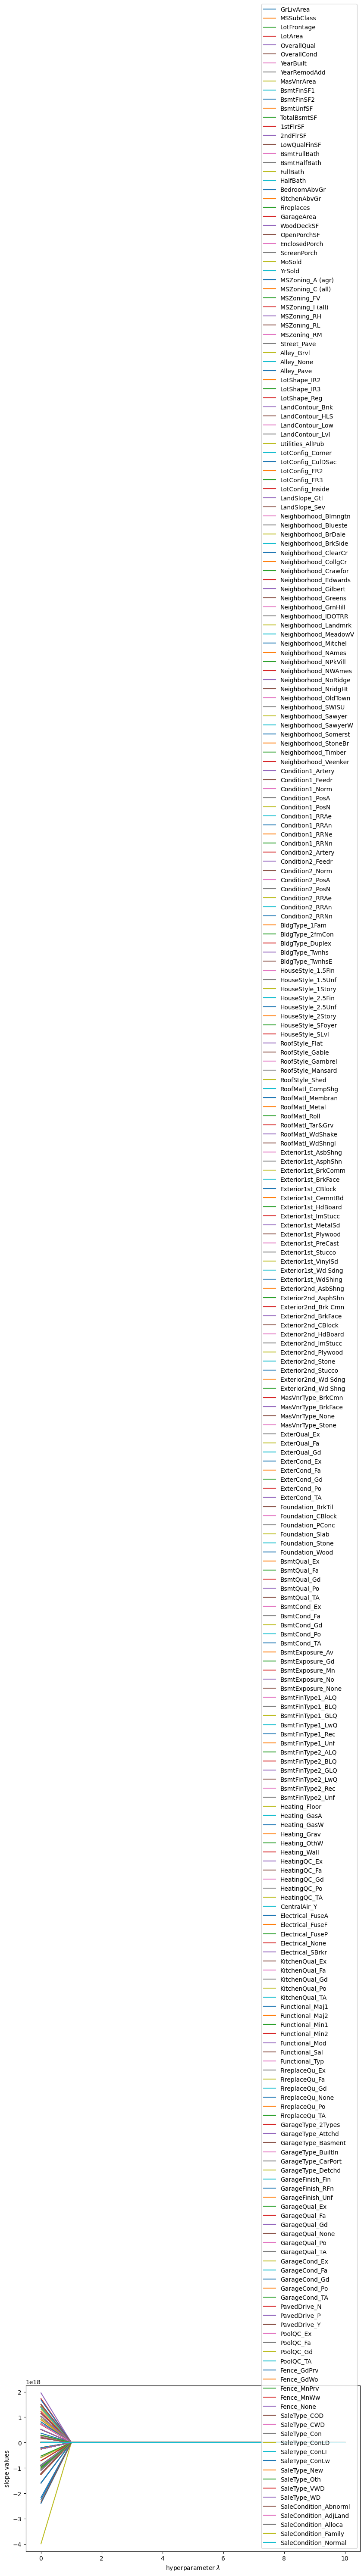

In [31]:
# something is wrong here
# why is the grid search returning 9 as the optimum alpha?
# why are all coefficients going to 0?
# why is R^2 increasing instead of decreasing?

plt.rcParams['figure.figsize'] = (10,5)
for name in coefs.columns:
    plt.plot(coefs.index, coefs[name], label=name)
plt.legend(loc=4)   
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')

Text(0, 0.5, '$R^2$')

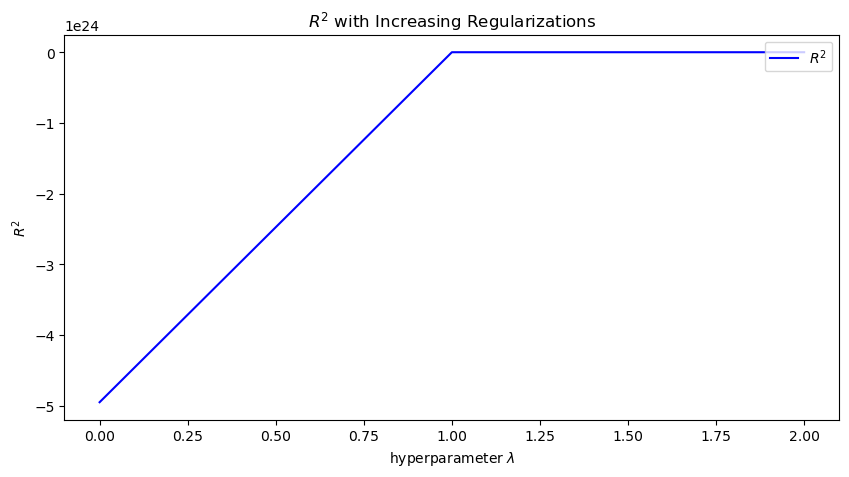

In [78]:
plt.plot(alphas, scores, c="b", label=r"$R^2$")
plt.legend(loc=1)
plt.title(r"$R^2$ with Increasing Regularizations")
plt.xlabel(r"hyperparameter $\lambda$")
plt.ylabel(r"$R^2$")

## Lasso Regression

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=True)

lasso = Lasso()
lasso.fit(X_train, y_train)

cv = KFold(n_splits=10)

scores = cross_val_score(ridge, X_test, y_test, cv=cv, scoring="r2")
print(f"Average R-squared score: {scores.mean()}")

Average R-squared score: 0.9054744874220375


/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.266e+10, tolerance: 9.449e+08
  model = cd_fast.enet_coordinate_descent(


In [37]:
params = {
    "alpha": arange(0, 20, 1)
}

gs = GridSearchCV(lasso, params, scoring='r2', cv=kfold)
gs.fit(X_train, y_train)

print(gs.best_params_)
print(gs.score(X_test, y_test))

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.441e+11, tolerance: 6.299e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklear

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.249e+10, tolerance: 6.627e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.176e+09, tolerance: 6.299e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

{'alpha': 19}
0.9234713204007347


In [36]:
params = {
    "alpha": arange(19, 30, .1)
}

gs = GridSearchCV(lasso, params, scoring='r2', cv=kfold)
gs.fit(X_train, y_train)

print(gs.best_params_)
print(gs.score(X_test, y_test))

{'alpha': 29.900000000000155}
0.9226391122378349


In [80]:
alphas = np.linspace(0.1, 20.1, 20)
lasso.set_params()
coefs_lasso = []

for alpha in alphas:
    lasso.set_params(alpha=alpha)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)

coefs_lasso = pd.DataFrame(coefs_lasso, index=alphas, columns=X_train.columns)
coefs_lasso.head()

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.304e+11, tolerance: 9.449e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.861e+10, tolerance: 9.449e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

,GrLivArea,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,MSZoning_A (agr),MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,...,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_None,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_TA,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
0.100000,41230.438689,-1433.214210,-2228.796085,6248.384255,8540.449425,6411.407521,9487.837157,997.463205,4816.338725,12158.717007,5185.865227,4457.754861,2989.683699,-11031.356952,-8070.797272,-1702.919846,1059.862443,208.356337,600.069477,325.740066,-3242.276627,-2111.255062,6285.850177,5012.507112,979.460539,-332.246807,1006.802712,2184.141420,-724.043730,-497.780837,0.0,-6815.255829,-10029.033748,-2566.943201,8084.029977,5145.634487,-139.558756,8710.989188,0.0,532.039835,-989.709709,389.255933,-3265.967688,812.919426,-5963.519456,67.135167,-8582.346694,250.656276,0.0,1391.497831,4078.910715,-3827.345583,-13652.972035,0.0,-5112.427159,-31165.943955,6502.604345,11627.477118,8319.916098,2209.996954,-1778.350158,-4862.190840,10429.406688,-14945.313560,-2794.096332,15577.996806,76120.545774,-6736.062517,0.0,5657.327569,-11461.662885,-12067.581721,22764.973734,-10392.237738,26680.366191,18335.815525,-13394.461702,-16857.222206,-40

Text(0, 0.5, 'slope values')

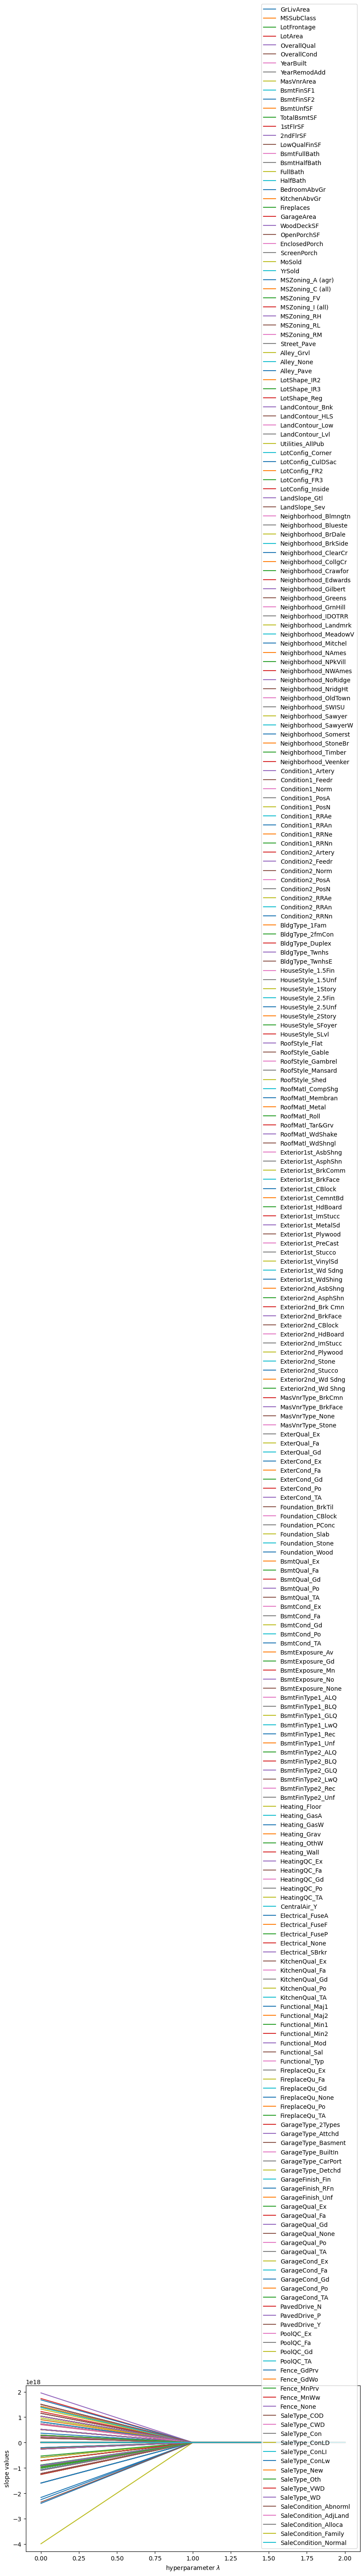

In [81]:
plt.rcParams["figure.figsize"] = (10, 5)
for name in coefs.columns:
    plt.plot(coefs.index, coefs[name], label=name)
plt.legend(loc=4)
plt.xlabel(r"hyperparameter $\lambda$")
plt.ylabel(r"slope values")

## ElasticNet

In [83]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=True
)

elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)


# print(r'The R^2 is %.2f' %(elasticnet.score(house_features, prices)))
# elasticnet.coef_,  elasticnet.intercept_

elasticnet.fit(X_train, y_train)

cv = KFold(n_splits=10)
scores = cross_val_score(elasticnet, X_test, y_test, cv=cv, scoring="r2")

print(f"Average R-squared score: {scores.mean()}")

Average R-squared score: 0.906590605824056


In [ ]:
# feature selection 
# option 1: remove vars with 0 featuer importance (f_regression)
# option 2: remove vars with 0 featuer importance (mutual_info_regression)
# option 3: SelectKBest - 260
# option 4: SelectFromModel(Lasso)

In [133]:
# from https://towardsdatascience.com/feature-selection-using-regularisation-a3678b71e499

from sklearn.feature_selection import SelectFromModel
sel_ = SelectFromModel(Lasso())
sel_.fit(X_train, y_train)

selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 268
selected features: 0
features with coefficients shrank to zero: 268


In [ ]:
# adapted from Vivian

In [162]:
feature_sets_1 = {
    "all features, scaled and dummified": features_scaled, # 268 total
    "SelectKBest f_regression": feat_fregression, # top 260
    "SelectKBest mutual_info": feat_mutualreg, # top 209
}

In [163]:
regression_models = {
    #"Linear": LinearRegression(),
    "Ridge" : Ridge(random_state = 0),
    "Lasso": Lasso(random_state = 0)
    #"ElasticNet": ElasticNet(random_state = 42)
    #"DecisionTree" : tree.DecisionTreeRegressor(random_state = 42, max_depth=6),
    #"RandomForest" : RandomForestRegressor(random_state = 42),
    #"XGBoost": XGBRegressor(random_state = 42),
    #"LGBM": LGBMRegressor(random_state = 42),
    #"MLP":  MLPRegressor(random_state = 42),    
}

In [168]:
def make_regression(x_train, y_train, x_test, y_test, model, model_name, verbose=True):

    model.fit(x_train,y_train)
    
    y_predict=model.predict(x_train)
    train_error = mean_squared_error(y_train, y_predict, squared=False)
    train_r2 = r2_score(y_train, y_predict)
    
    y_predict =model.predict(x_test)
    test_error = mean_squared_error(y_test, y_predict, squared=False)
    test_r2 = r2_score(y_test, y_predict)
    
    if verbose:
        print("----Model name = {}-----".format(model_name))
        print("Train error = "'{}'.format(train_error))
        print("Test error = "'{}'.format(test_error))
        print("train_r2_score = "'{}'.format(train_r2))
        print("test_r2_score = "'{}'.format(test_r2))
        print("--------------------------------")
    
    trained_model = model
    
    return trained_model, y_predict, train_error, test_error, train_r2, test_r2

In [169]:
pred_dict = {
    "regression_model": [],
    "feature_set": [],
    "Train Error": [],
    "Test Error": [],
    "Train_R2" : [],
    "Test_R2" : []
}

In [172]:
for feature_set_name in feature_sets_1.keys():
    
    feature_set = feature_sets_1[feature_set_name]
    print("Included columns are {}".format(feature_set_name))
    
    for model_name in regression_models.keys():        
        
        y = price
        x = feature_set
        x_train, x_test, y_train, y_test = train_test_split(x, log_y, test_size=0.2, random_state=42)

        trained_model, y_predict, train_error, test_error, train_r2, test_r2 = make_regression(x_train, y_train, x_test, y_test, regression_models[model_name], model_name, verbose=True)

        pred_dict["regression_model"].append(model_name)
        pred_dict["feature_set"].append(feature_set_name)
        pred_dict["Train Error"].append(train_error)
        pred_dict["Test Error"].append(test_error)
        pred_dict["Train_R2"].append(train_r2)
        pred_dict["Train_R2"].append(test_r2)

Included columns are all features, scaled and dummified
----Model name = Ridge-----
Train error = 0.09435590614333131
Test error = 0.10766711365685935
train_r2_score = 0.9404051030302837
test_r2_score = 0.9234658881590436
--------------------------------
----Model name = Lasso-----
Train error = 0.3865133982572042
Test error = 0.39046534553433787
train_r2_score = 0.0
test_r2_score = -0.006592978213698419
--------------------------------
Included columns are SelectKBest f_regression
----Model name = Ridge-----
Train error = 0.0945022629499942
Test error = 0.10761457331561786
train_r2_score = 0.9402200826394506
test_r2_score = 0.92354056550635
--------------------------------
----Model name = Lasso-----
Train error = 0.3865133982572042
Test error = 0.39046534553433787
train_r2_score = 0.0
test_r2_score = -0.006592978213698419
--------------------------------
Included columns are SelectKBest mutual_info
----Model name = Ridge-----
Train error = 0.09789745921667416
Test error = 0.108956966

In [ ]:
# from Vivian - I think it's cut off
pred_df["feature_set_2"] = pred_df["feature_set"].apply(lambda x: x.split('_')[0])
pred_df["Model_with_Data_set"] = pred_df['regression_model'] +"_"+ pred_df["feature_set_2"]

df_barh = pred_df[["Train Error","Test Error", "R2", "Model_with_Data_set" ]]
df_train_error = df_barh[['Model_with_Data_set', 'Train Error']]
df_test_error = df_barh[['Model_with_Data_set', 'Test Error']]

In [147]:
# grid search for elastic net

from numpy import arange
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

kfold = KFold(n_splits=3, shuffle=True, random_state=0)
elasticnet = ElasticNet()

params = {
    "alpha": [0.0001, 0.01, 1, 100, 10000, 1000000],
    "l1_ratio": arange(0, 1, 0.01)
}

gs = GridSearchCV(elasticnet, params, scoring='r2', cv=kfold)
gs.fit(X_train_scaled, y_train)

print(gs.best_params_)
print(gs.score(X_train_scaled, y_train)) # why is this worse than above?
print(gs.score(X_test_scaled, y_test))

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.762e+11, tolerance: 6.681e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.886e+11, tolerance: 6.887e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solv

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.885e+11, tolerance: 6.887e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.660e+11, tolerance: 6.850e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.885e+11, tolerance: 6.887e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.660e+11, tolerance: 6.850e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.885e+11, tolerance: 6.887e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.659e+11, tolerance: 6.850e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.885e+11, tolerance: 6.887e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.659e+11, tolerance: 6.850e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.761e+11, tolerance: 6.681e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.884e+11, tolerance: 6.887e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.658e+11, tolerance: 6.850e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.761e+11, tolerance: 6.681e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.884e+11, tolerance: 6.887e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.658e+11, tolerance: 6.850e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.761e+11, tolerance: 6.681e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.884e+11, tolerance: 6.887e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.658e+11, tolerance: 6.850e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.761e+11, tolerance: 6.681e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.657e+11, tolerance: 6.850e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.760e+11, tolerance: 6.681e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.883e+11, tolerance: 6.887e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.657e+11, tolerance: 6.850e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.882e+11, tolerance: 6.887e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.657e+11, tolerance: 6.850e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.837e+11, tolerance: 6.850e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.895e+11, tolerance: 6.681e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.854e+11, tolerance: 6.681e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.028e+11, tolerance: 6.887e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.768e+11, tolerance: 6.850e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.827e+11, tolerance: 6.681e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.006e+11, tolerance: 6.887e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.770e+11, tolerance: 6.850e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.805e+11, tolerance: 6.681e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.992e+11, tolerance: 6.887e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.812e+11, tolerance: 6.681e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.977e+11, tolerance: 6.887e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.742e+11, tolerance: 6.850e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.812e+11, tolerance: 6.681e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.963e+11, tolerance: 6.887e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.741e+11, tolerance: 6.850e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.789e+11, tolerance: 6.681e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.951e+11, tolerance: 6.887e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.795e+11, tolerance: 6.681e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.935e+11, tolerance: 6.887e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.705e+11, tolerance: 6.850e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.788e+11, tolerance: 6.681e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.911e+11, tolerance: 6.887e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.691e+11, tolerance: 6.850e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.895e+11, tolerance: 6.887e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.673e+11, tolerance: 6.850e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.451e+11, tolerance: 6.850e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.008e+12, tolerance: 6.681e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solv

{'alpha': 1, 'l1_ratio': 0.84}
0.9304867045404852
0.9091796133965684
